# Explore here

In [1]:
import os
import pandas as pd
import numpy as np
#import seaborn as sns
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt

# load the .env file variables
load_dotenv()




True

In [8]:
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

# Spotify API connection
spotify_connection = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

# Define the artist ID
artist_id = "0SfsnGyD8FpIN4U4WCkBZ5" # Armin van Buuren id
#artist_id = "2yEwvVSSSUkcLeSTNyHKh8" # TOOL
#artist_id = "2ye2Wgw4gimLv2eAKyk1NB" # Metallica
#artist_id = "1Cs0zKBU1kc0i8ypK3B9ai" # David Guetta
#artist_id = "06HL4z0CvFAxyc27GXpf02" # Taylor Swift

# Fetch the top tracks of the artist
artist = spotify_connection.artist_top_tracks(artist_id)

if artist:
    # Extract the tracks from the artist dictionary
    tracks = artist.get("tracks", [])
    
    # Define a function to process each track
    def process_track(track):
        return { 
            k: (v / (1000 * 60)) % 60 if k == "duration_ms" else v
            for k, v in track.items()
            if k in ["name", "popularity", "duration_ms"]
        }
    
    # Apply the processing function to each track in the tracks list
    processed_tracks = [process_track(track) for track in tracks]

    # Create DataFrame using the processed tracks
    tracks_df = pd.DataFrame.from_records(processed_tracks)
    
    # Sort DataFrame by popularity
    tracks_df.sort_values(["popularity"], inplace=True)
    
    # Print the top 3 tracks
    print(tracks_df.head(10))

   duration_ms                        name  popularity
6     3.028000          In And Out Of Love          62
9     3.596217                Great Spirit          63
8     2.530333                Easy To Love          64
4     3.777017          In And Out Of Love          64
7     2.925767            Larger Than Life          65
5     2.173533                      No Fun          65
2     3.058633              Blah Blah Blah          66
3     2.482167                 In The Dark          68
0     2.842967                     On & On          71
1     3.406000  This Is What It Feels Like          72


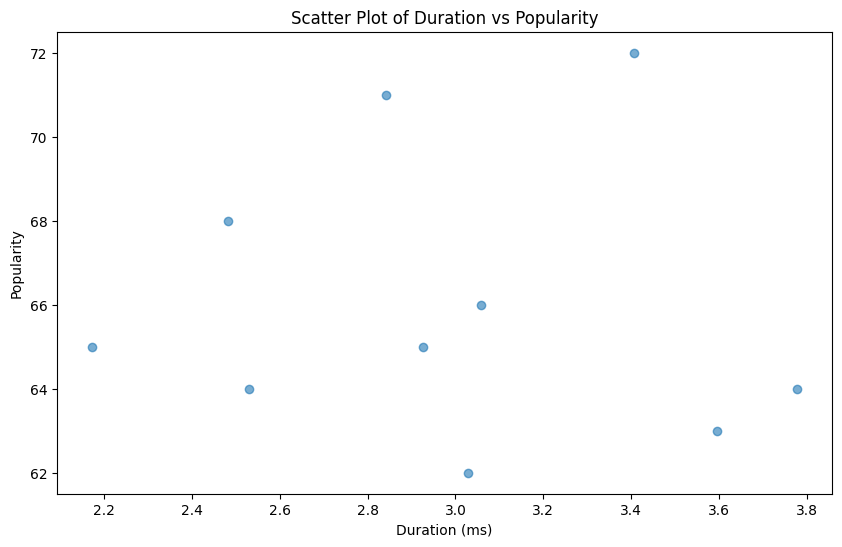

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(tracks_df['duration_ms'], tracks_df['popularity'], alpha=0.6)
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.title('Scatter Plot of Duration vs Popularity')

plt.show()